# 1 Load the data-set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston = pd.read_csv("boston.csv")
boston

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

# 2 Review the data quantitatively

- count: The number of items in the dataframe
- mean: The mean or 'average' value .. sum of values/number of values
- std: Standard deviation - a measure of spread in the data
- min: The smallest value
- 25%, 50%, 75%: Quartile values
- max: The largest value

In [3]:
boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [4]:
pd.isnull(boston).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

# 3 Review the data visually

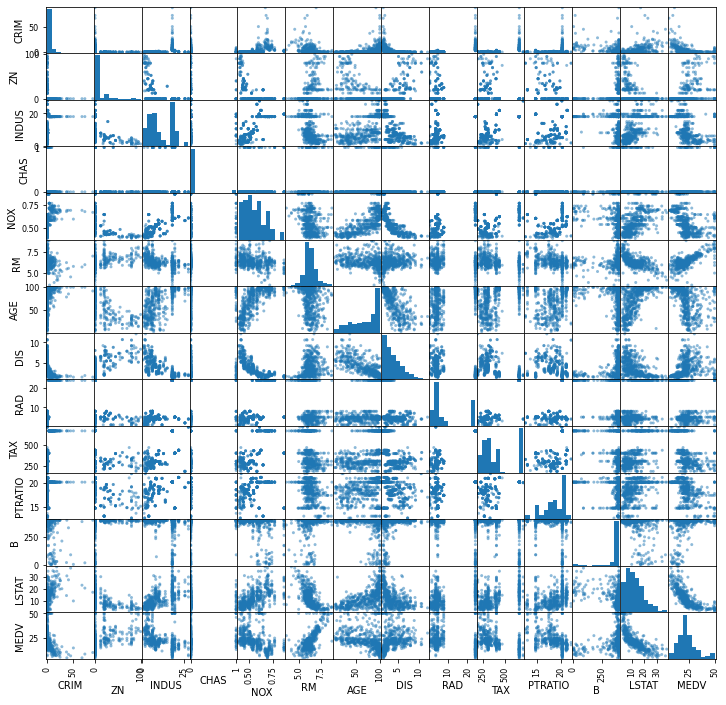

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(boston, figsize=(12,12));

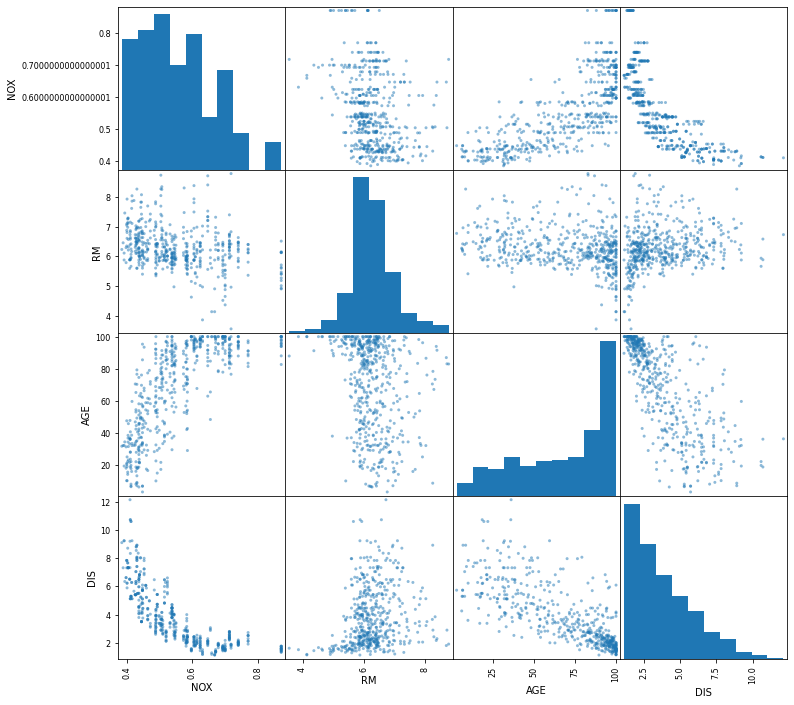

In [7]:
boston_fewer_columns = boston.iloc[:, 4:8:1]
scatter_matrix(boston_fewer_columns, figsize=(12,12));

(14.5, -0.5)

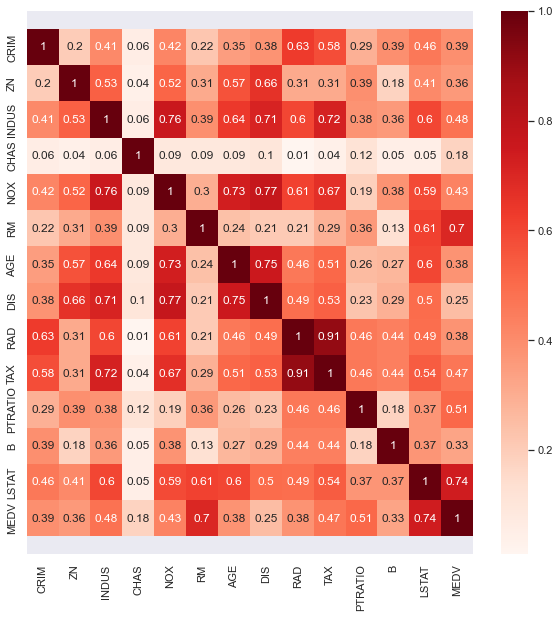

In [9]:
correlation_matrix = np.absolute(boston.corr().round(2))
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

<IPython.core.display.Javascript object>


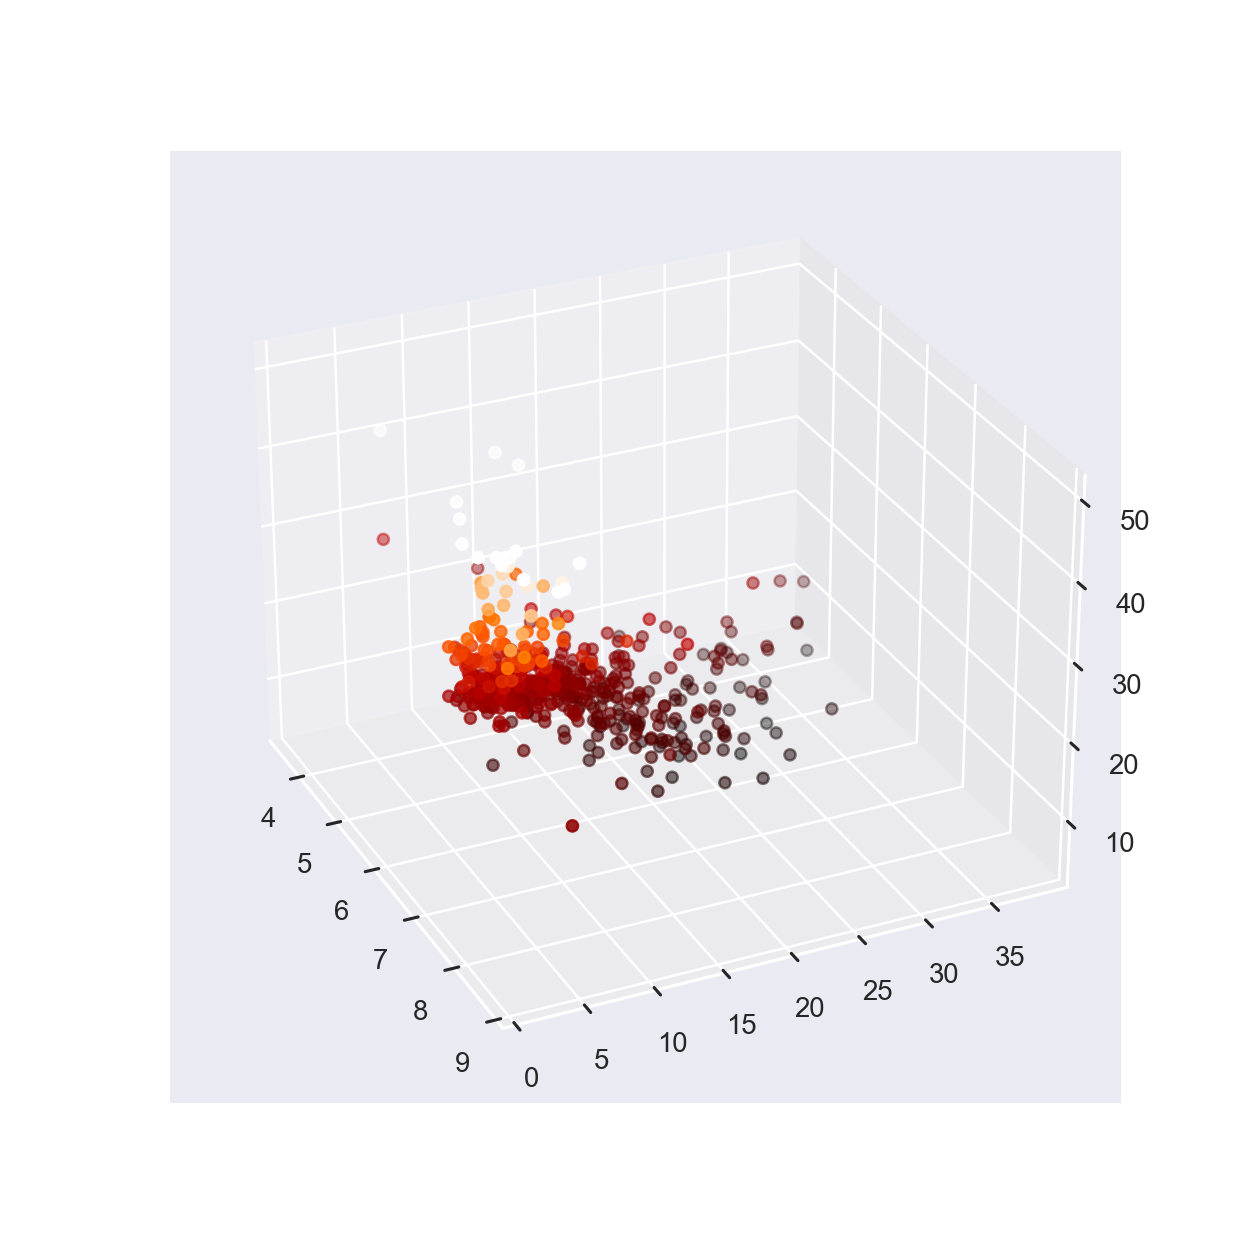

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(boston['RM'], boston['LSTAT'], boston['MEDV'], c=boston['MEDV'], cmap='gist_heat')

# 4 Selecting the data we wish to use for modelling

In [12]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns=['LSTAT','RM'])
Y = boston['MEDV']
X

LSTAT     RM
0     4.98  6.575
1     9.14  6.421
2     4.03  7.185
3     2.94  6.998
4     5.33  7.147
..     ...    ...
501   9.67  6.593
502   9.08  6.120
503   5.64  6.976
504   6.48  6.794
505   7.88  6.030

[506 rows x 2 columns]

# 5 Splitting data for training and testing

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train[0:5])

     LSTAT     RM
356  17.60  6.212
16    6.58  5.935
407  12.13  5.608
242  11.22  6.358
296   7.39  6.549


# 6 First model - Linear Regression

# 6.1 Build the linear regression model

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

## 6.2 Test the linear regression model

In [17]:
y_train_predict = lin_model.predict(X_train)
r2_train = r2_score(Y_train, y_train_predict)
rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [18]:
y_test_predict = lin_model.predict(X_test)
r2_test = r2_score(Y_test, y_test_predict)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [19]:
print("R2:")
print("  Train =", r2_train)
print("  Test  =", r2_test)
print("RMSE:")
print("  Train =", rmse_train)
print("  Test  =", rmse_test)

R2:
  Train = 0.6816353055297828
  Test  = 0.4744845344115045
RMSE:
  Train = 5.137127943856768
  Test  = 6.88687737745084


# 7 Second model - Ploynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
print(poly_features.get_feature_names(["LSTAT","RM"]))

['1', 'LSTAT', 'RM', 'LSTAT^2', 'LSTAT RM', 'RM^2', 'LSTAT^3', 'LSTAT^2 RM', 'LSTAT RM^2', 'RM^3']


D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
X_train_poly[0:5]

array([[1.00000000e+00, 1.76000000e+01, 6.21200000e+00, 3.09760000e+02,
        1.09331200e+02, 3.85889440e+01, 5.45177600e+03, 1.92422912e+03,
        6.79165414e+02, 2.39714520e+02],
       [1.00000000e+00, 6.58000000e+00, 5.93500000e+00, 4.32964000e+01,
        3.90523000e+01, 3.52242250e+01, 2.84890312e+02, 2.56964134e+02,
        2.31775400e+02, 2.09055775e+02],
       [1.00000000e+00, 1.21300000e+01, 5.60800000e+00, 1.47136900e+02,
        6.80250400e+01, 3.14496640e+01, 1.78477060e+03, 8.25143735e+02,
        3.81484424e+02, 1.76369716e+02],
       [1.00000000e+00, 1.12200000e+01, 6.35800000e+00, 1.25888400e+02,
        7.13367600e+01, 4.04241640e+01, 1.41246785e+03, 8.00398447e+02,
        4.53559120e+02, 2.57016835e+02],
       [1.00000000e+00, 7.39000000e+00, 6.54900000e+00, 5.46121000e+01,
        4.83971100e+01, 4.28894010e+01, 4.03583419e+02, 3.57654643e+02,
        3.16952673e+02, 2.80882687e+02]])

In [23]:
polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly, Y_train)
print("Model coefficients   =", polynomial_model.coef_)
print("Constant term (bias) =", polynomial_model.intercept_)

Model coefficients   = [ 0.00000000e+00 -2.62973934e+00 -9.33403904e+01 -5.91054560e-02
  1.46221476e+00  1.40311120e+01  5.47822807e-04  4.60264446e-03
 -1.71627139e-01 -5.98436242e-01]
Constant term (bias) = 208.2701882221876


In [24]:
y_train_predicted = polynomial_model.predict(X_train_poly)
y_test_predict = polynomial_model.predict(poly_features.fit_transform(X_test))

In [25]:
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
r2_train = r2_score(Y_train, y_train_predicted)

rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2_test = r2_score(Y_test, y_test_predict)
print("R2:")
print("  Train =", r2_train)
print("  Test  =", r2_test)
print("RMSE:")
print("  Train =", rmse_train)
print("  Test  =", rmse_test)

R2:
  Train = 0.8135424956581347
  Test  = 0.5849489407545195
RMSE:
  Train = 3.9314057254691694
  Test  = 6.120407840507497
